<a href="https://colab.research.google.com/github/Lav3112/Data-analysis-on-HealthCare-DataSet/blob/main/HealthCarePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1 | Importing Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio
import sklearn
import plotly.express as ex

import warnings
warnings.filterwarnings('ignore')

**2 | Dataset**

In [5]:
df = pd.read_csv("/content/healthcare_prediction_dataset1.csv")
df.head().T

,0,1,2,3,4
Name,Bobby JacksOn,LesLie TErRy,DaNnY sMitH,andrEw waTtS,adrIENNE bEll
Age,30,62,76,28,43
Gender,Male,Male,Female,Female,Female
Blood Type,B-,A+,A-,O+,AB+
Medical Condition,Cancer,Obesity,Obesity,Diabetes,Cancer
Date of Admission,2024-01-31,2019-08-20,2022-09-22,2020-11-18,2022-09-19
Doctor,Matthew Smith,Samantha Davies,Tiffany Mitchell,Kevin Wells,Kathleen Hanna
Hospital,Sons and Miller,Kim Inc,Cook PLC,"Hernandez Rogers and Vang,",White-White
Insurance Provider,Blue Cross,Medicare,Aetna,Medicare,Aetna
Billing Amount,18856.281306,33643.327287,27955.096079,37909.78241,14238.317814


**3 | Inspecting Dataframe Structure**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [ ]:
df.isna().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [ ]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [ ]:
df.shape

(55500, 15)

**4 | EDA**

In [6]:
# Numerical features

df.describe(exclude=['O'])

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


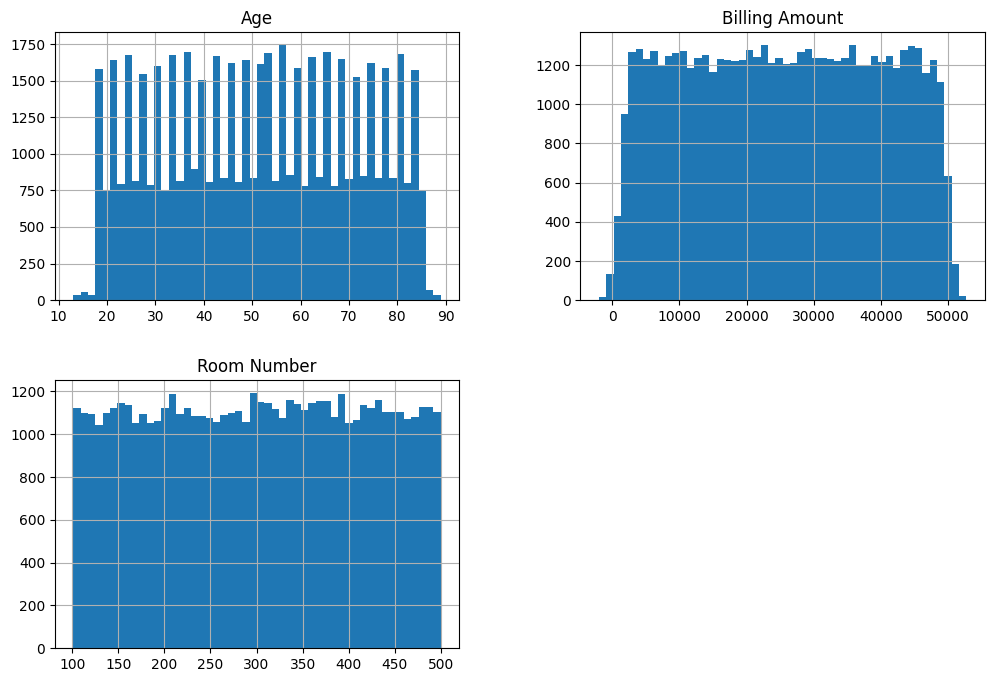

In [ ]:
# Histogram

df.hist(bins=50, figsize=(12,8))
plt.show()

In [ ]:
# categorical features

df.describe(include=['O'])

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500
unique,49992,2,8,6,1827,40341,39876,5,3,1856,5,3
top,DAvId muNoZ,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,Elective,2020-03-15,Lipitor,Abnormal
freq,3,27774,6969,9308,50,27,44,11249,18655,53,11140,18627


In [ ]:
cols = ['Gender','Blood Type', 'Medical Condition',
        'Insurance Provider', 'Admission Type',
        'Medication', 'Test Results']

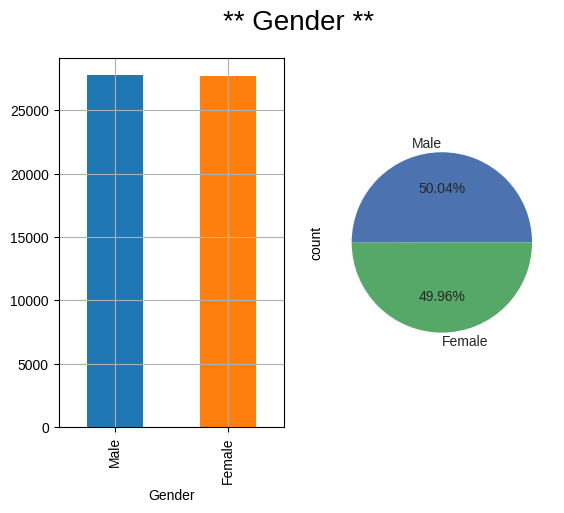

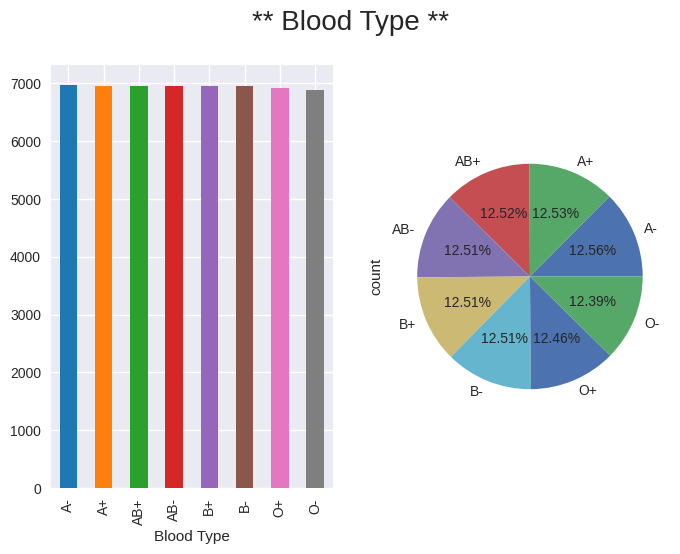

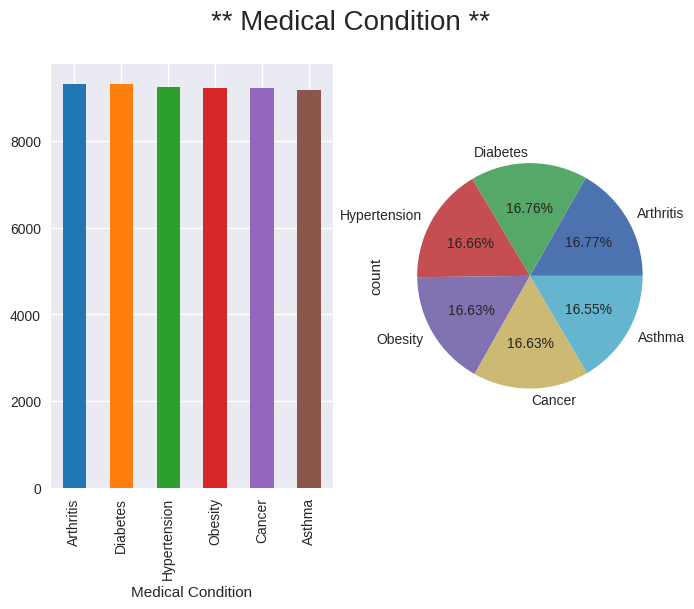

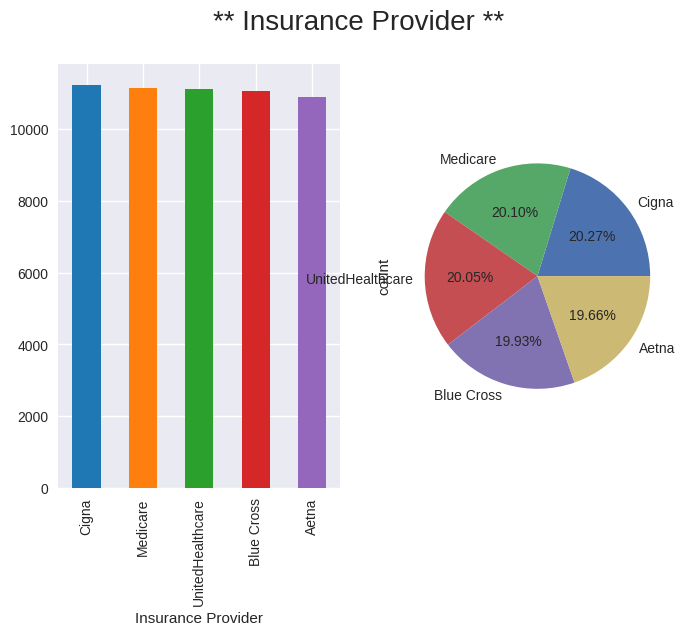

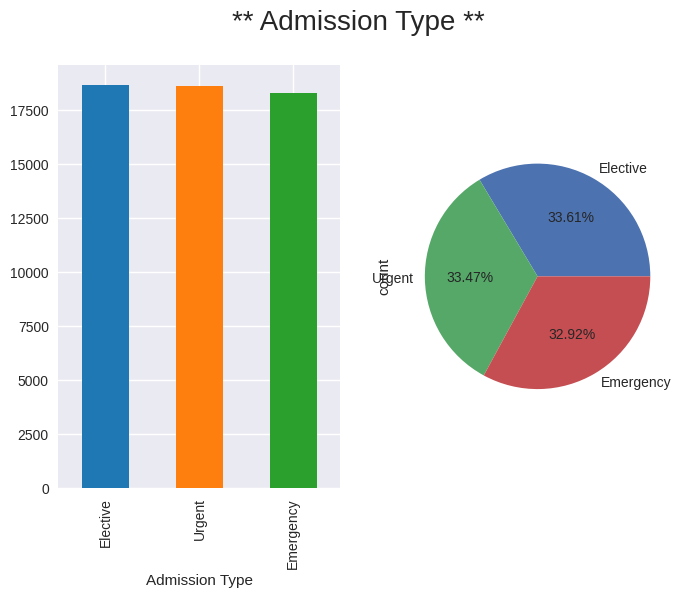

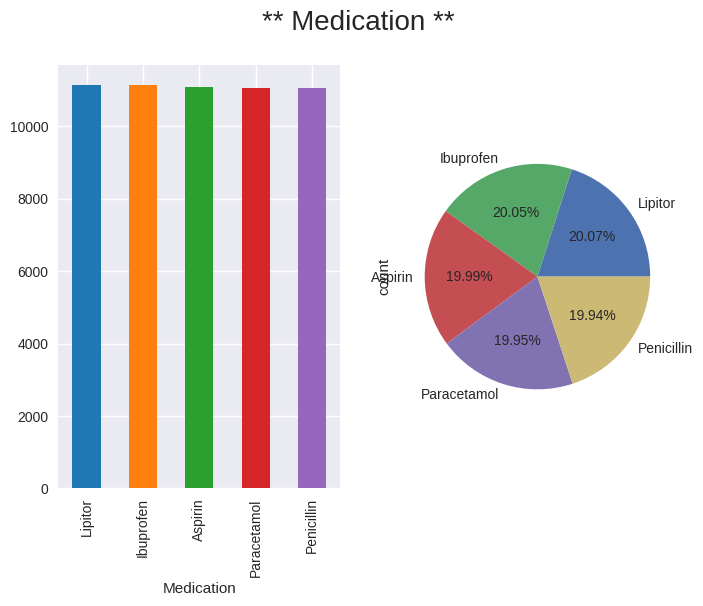

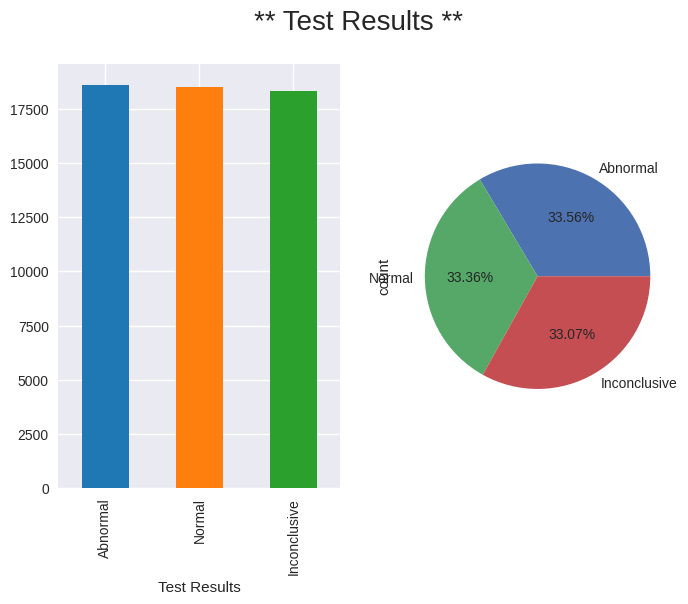

In [ ]:
# Categorical Features
for i in cols:

    if i == 'Gender':

        fig, ax = plt.subplots(1, 2)
        fig.suptitle('** Gender **', fontsize=20)
        plt.style.use('seaborn')
        plt.subplot(1,2,1)
        df['Gender'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
        plt.subplot(1,2,2)
        df['Gender'].value_counts().plot(kind='pie',autopct="%.2f%%")
        plt.show()

    else:

        fig, ax = plt.subplots(1, 2)
        fig.suptitle('** ' + i + ' **', fontsize=20)
        plt.style.use('seaborn')
        plt.subplot(1,2,1)
        df[i].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
        plt.subplot(1,2,2)
        df[i].value_counts().plot(kind='pie',autopct="%.2f%%")
        plt.show()

In [ ]:
cols = ['Gender','Blood Type', 'Medical Condition','Doctor',
        'Hospital', 'Insurance Provider', 'Admission Type',
        'Medication', 'Test Results']

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio

# Set the renderer to iframe for Google Colab
pio.renderers.default = 'iframe'

# Your plotting code
for i in cols:

    if i == 'Gender':
        char_bar = df.groupby(['Gender'])[['Days hospitalized']].mean().reset_index()
        char_bar = char_bar.sort_values(by=("Days hospitalized"), ascending=False)

        top = char_bar.head(10)
        fig = go.Figure()
        fig.add_trace(go.Bar(x=top['Gender'], y=top["Days hospitalized"]))

        fig.update_layout(title='Highest Gender according to average number of days hospitalized',
                          xaxis_title='Gender',
                          yaxis_title="Days hospitalized",
                          plot_bgcolor='black',
                          paper_bgcolor='gray',
                          font=dict(color='blue'))

        fig.show()  # Display the figure

    else:
        char_bar = df.groupby([i])[['Days hospitalized']].mean().reset_index()
        char_bar = char_bar.sort_values(by=("Days hospitalized"), ascending=False)

        top = char_bar.head(10)
        fig = go.Figure()
        fig.add_trace(go.Bar(x=top[i], y=top['Days hospitalized']))

        fig.update_layout(title="Highest " + i + " according to average number of days hospitalized",
                          xaxis_title=i,
                          yaxis_title="Days hospitalized",
                          plot_bgcolor='black',
                          paper_bgcolor='gray',
                          font=dict(color='blue'))

        fig.show()  # Display the figure


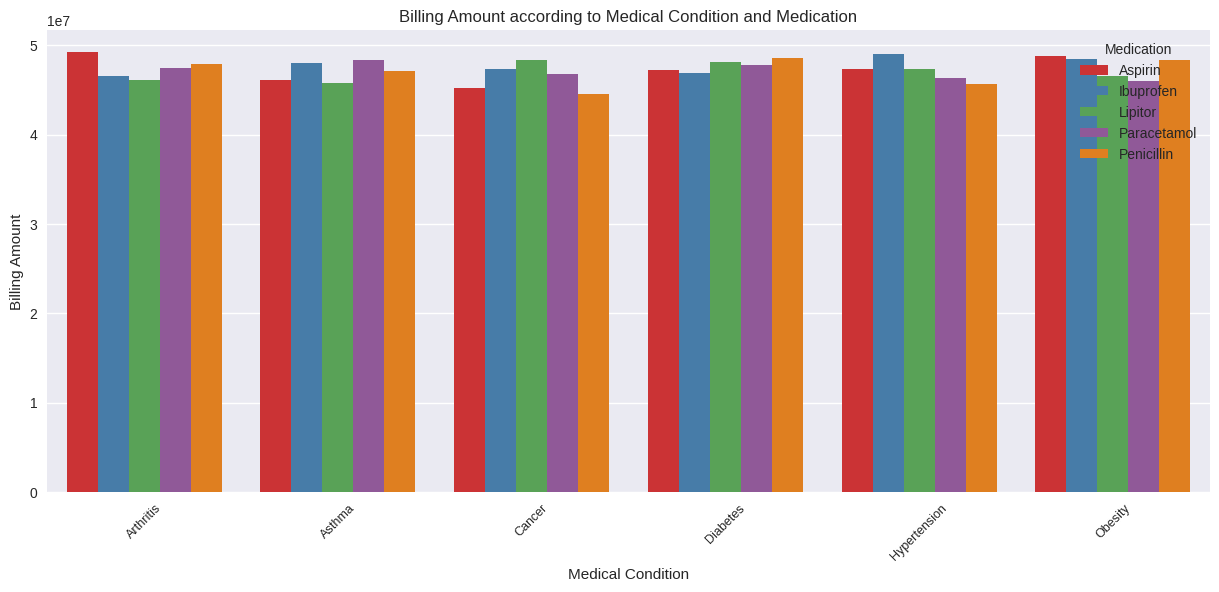

In [ ]:
# Billing Amount according to Medical Condition and Medication

df_trans = df.groupby(['Medical Condition', 'Medication'])[['Billing Amount']].sum().reset_index()

plt.figure(figsize=(15,6))
sns.barplot(x=df_trans['Medical Condition'], y=df_trans['Billing Amount'], hue=df_trans['Medication'], ci=None, palette="Set1")
plt.title("Billing Amount according to Medical Condition and Medication")
plt.ylabel("Billing Amount")
plt.xticks(rotation=45, fontsize = 9)
plt.show()

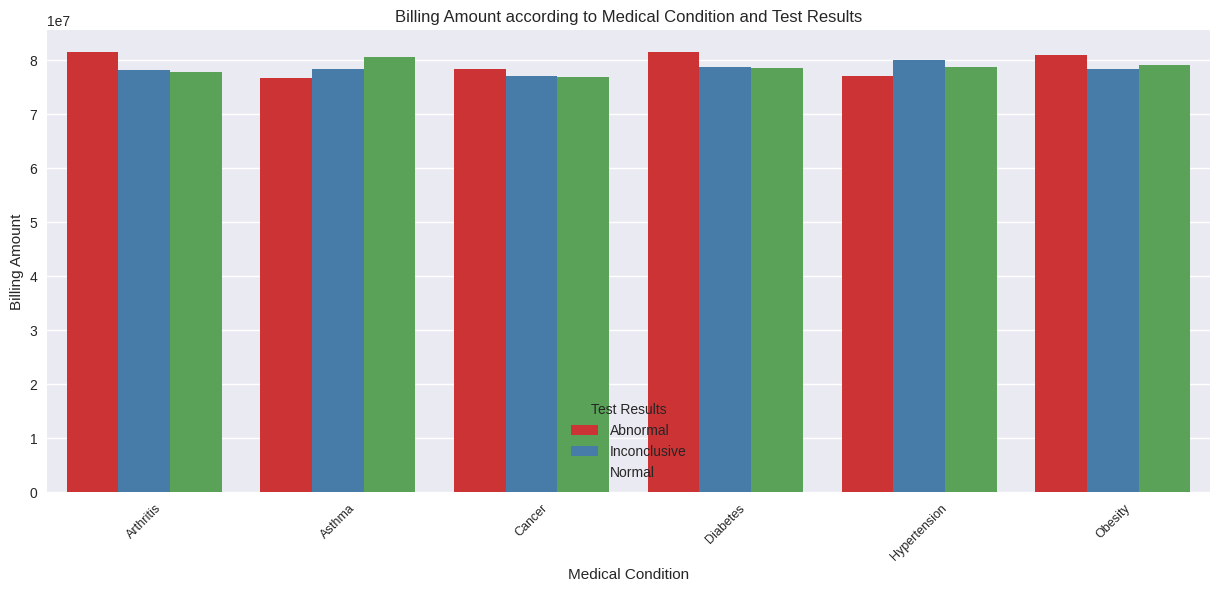

In [ ]:
# Billing Amount according to Medical Condition and Test Results

df_trans = df.groupby(['Medical Condition', 'Test Results'])[['Billing Amount']].sum().reset_index()

plt.figure(figsize=(15,6))
sns.barplot(x=df_trans['Medical Condition'], y=df_trans['Billing Amount'], hue=df_trans['Test Results'], ci=None, palette="Set1")
plt.title("Billing Amount according to Medical Condition and Test Results")
plt.ylabel("Billing Amount")
plt.xticks(rotation=45, fontsize = 9)
plt.show()

In [ ]:
# Let's create a column with the number of days hospitalized

df['Date of Admission']= pd.to_datetime(df['Date of Admission'])
df['Discharge Date']= pd.to_datetime(df['Discharge Date'])
df['Days hospitalized'] = df['Discharge Date'] - df['Date of Admission']
df['Days hospitalized'] = df['Days hospitalized'].astype(int) / 86400000000000 # Converting to number of days

df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Days hospitalized
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2.0
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6.0
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15.0
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30.0
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20.0


In [ ]:
import plotly.graph_objects as go
import plotly.io as pio

# Set the renderer for Google Colab
pio.renderers.default = 'colab'

# Your plotting code
for i in cols:

    if i == 'Gender':
        char_bar = df.groupby(['Gender'])[['Days hospitalized']].mean().reset_index()
        char_bar = char_bar.sort_values(by=("Days hospitalized"), ascending=False)

        top = char_bar.head(10)
        fig = go.Figure()
        fig.add_trace(go.Bar(x=top['Gender'], y=top["Days hospitalized"]))

        fig.update_layout(title='Highest Gender according to average number of days hospitalized',
                          xaxis_title='Gender',
                          yaxis_title="Days hospitalized",
                          plot_bgcolor='black',
                          paper_bgcolor='gray',
                          font=dict(color='white'))

        fig.show()  # Display the figure

    else:
        char_bar = df.groupby([i])[['Days hospitalized']].mean().reset_index()
        char_bar = char_bar.sort_values(by=("Days hospitalized"), ascending=False)

        top = char_bar.head(10)
        fig = go.Figure()
        fig.add_trace(go.Bar(x=top[i], y=top['Days hospitalized']))

        fig.update_layout(title="Highest " + i + " according to average number of days hospitalized",
                          xaxis_title=i,
                          yaxis_title="Days hospitalized",
                          plot_bgcolor='black',
                          paper_bgcolor='gray',
                          font=dict(color='white'))

        fig.show()  # Display the figure
